In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
fires = pd.read_csv('forest_fires.csv')

Text(0, 0.5, 'Humidity')

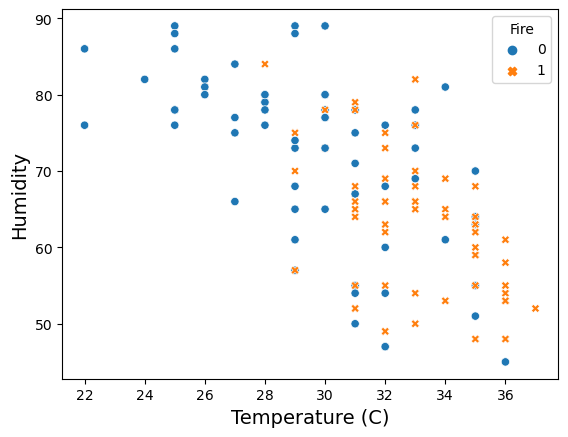

In [3]:
# Scatter plot of temperature vs. humidity
p = sns.scatterplot(data=fires, x='Temp', y='Humidity', hue='Fire', style='Fire')
p.set_xlabel('Temperature (C)', fontsize=14)
p.set_ylabel('Humidity', fontsize=14)

In [4]:
# Input features: temperature and humidity
X = fires[['Temp', 'Humidity']]

# Output feature: Fire
# Fire is stored as 0 and 1, which will automatically be converted by LinearSVC()
y = fires[['Fire']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a support vector classifier with C=0.1
SVC = LinearSVC(C=1.0, max_iter=10000)
SVC.fit(X_train, np.ravel(y_train))

LinearSVC(max_iter=10000)

In [5]:
# Evaluate model on testing data
SVC.score(X_test, np.ravel(y_test))

0.7027027027027027

In [6]:
# Print the model weights
# w0
print('w0:', SVC.intercept_)
# w1 and w2
print('w1 and w2:', SVC.coef_)

w0: [0.00604041]
w1 and w2: [[ 0.45660053 -0.0326264 ]]


In [7]:
# "Confidence scores" are proportional to distance from the hyperplane
SVC.decision_function(X_train)

array([ 3.96439630e-01,  2.88012873e-02,  6.87642454e-01,  1.81760773e-01,
        4.05742051e-02, -9.46069548e-03, -7.12450303e-01, -4.33020398e-01,
       -1.59476951e-01,  3.46877462e-02,  5.55285574e-01, -3.30065311e-02,
       -1.80079557e-01,  5.55285574e-01, -7.12450303e-01,  5.67058492e-01,
       -5.88923113e-01, -4.56566233e-01, -1.74193099e-01,  2.46423374e-01,
       -8.59523330e-01, -1.71249869e-01,  2.52309833e-01,  8.28829021e-01,
        4.05269319e-01, -2.56515077e-01,  2.58580579e-02, -3.57423659e-03,
       -4.44793316e-01,  2.93515046e-01,  4.28815154e-01,  5.40569427e-01,
       -2.77117683e-01,  5.11137133e-01, -3.38925502e-01,  2.58580579e-02,
        1.37612331e-01, -3.57423659e-03,  1.05236807e-01, -3.35982272e-01,
        6.87642454e-01,  3.81723483e-01,  5.43512657e-01, -8.68353018e-01,
        2.28763998e-01,  6.69983077e-01,  2.58196292e-01,  1.58214937e-01,
       -5.35944983e-01, -1.59476951e-01,  5.43512657e-01,  7.17074748e-01,
       -8.35977494e-01, -